In [ ]:
!pip install pandas==1.2.0

     |████████████████████████████████| 9.9 MB 5.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 6.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 41.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Importing necessary Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import mean_squared_error as mse
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/DS3C6S4TimeSeriesSalesDataProject.xls',index_col='Row ID')

In [ ]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Understanding Data

In [ ]:
data.shape

(9994, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [ ]:
data.nunique()

Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

# Data Preparation

In [ ]:
df1=data.copy()

In [ ]:
df1=df1.set_index('Order Date')

In [ ]:
df1.index.year.unique()

Int64Index([2016, 2015, 2014, 2017], dtype='int64', name='Order Date')

In [ ]:
df=df1.resample('M').mean()

In [ ]:
df1.drop('Postal Code',axis=1,inplace=True)

In [ ]:
df.shape

(48, 4)

In [ ]:
df.head()

,Sales,Quantity,Discount,Profit
Order Date,,,,
2014-01-31,180.213861,3.594937,0.126582,31.015072
2014-02-28,98.258522,3.456522,0.176087,18.745835
2014-03-31,354.719803,3.726115,0.167516,3.176624
2014-04-30,209.595148,3.970370,0.110000,25.843224
2014-05-31,193.838418,3.819672,0.155328,22.448439


# Exploratory Data Analysis (EDA)

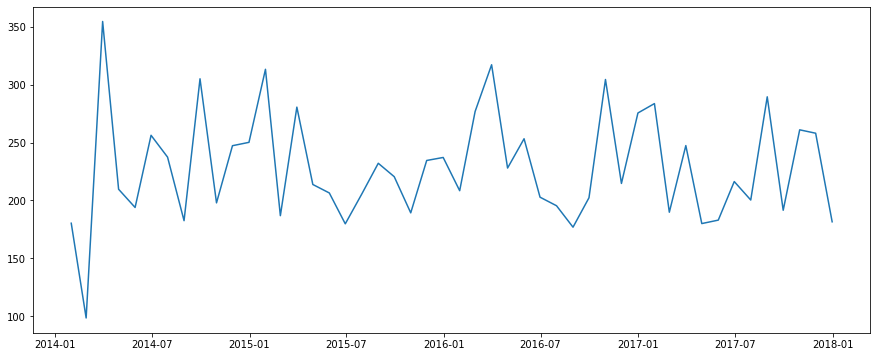

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df['Sales']);

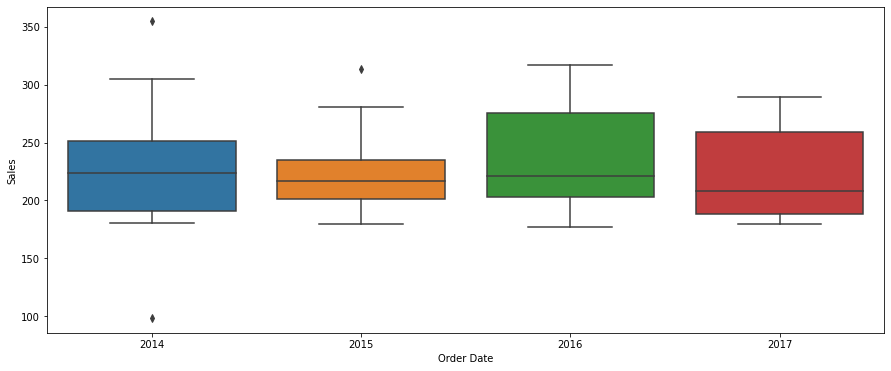

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(y=df['Sales'],x=df.index.year);

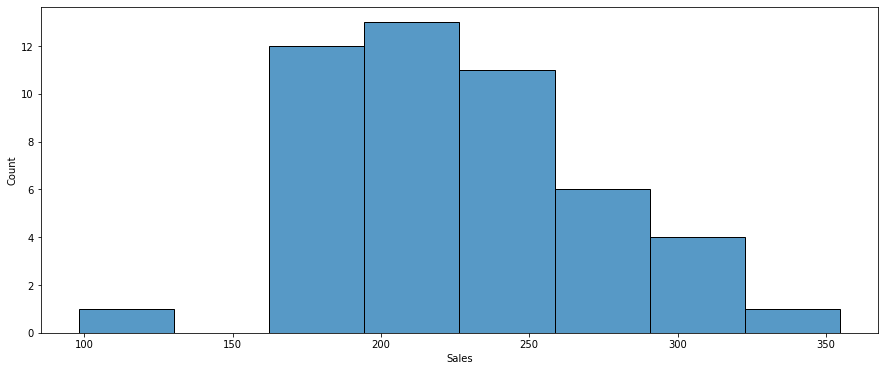

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df['Sales']);

# Data Split and Decomposition

In [ ]:
test=df.iloc[int(0.75 * len(df)):]
train=df.iloc[:int(0.75 * len(df))]

**Data Decomposition**

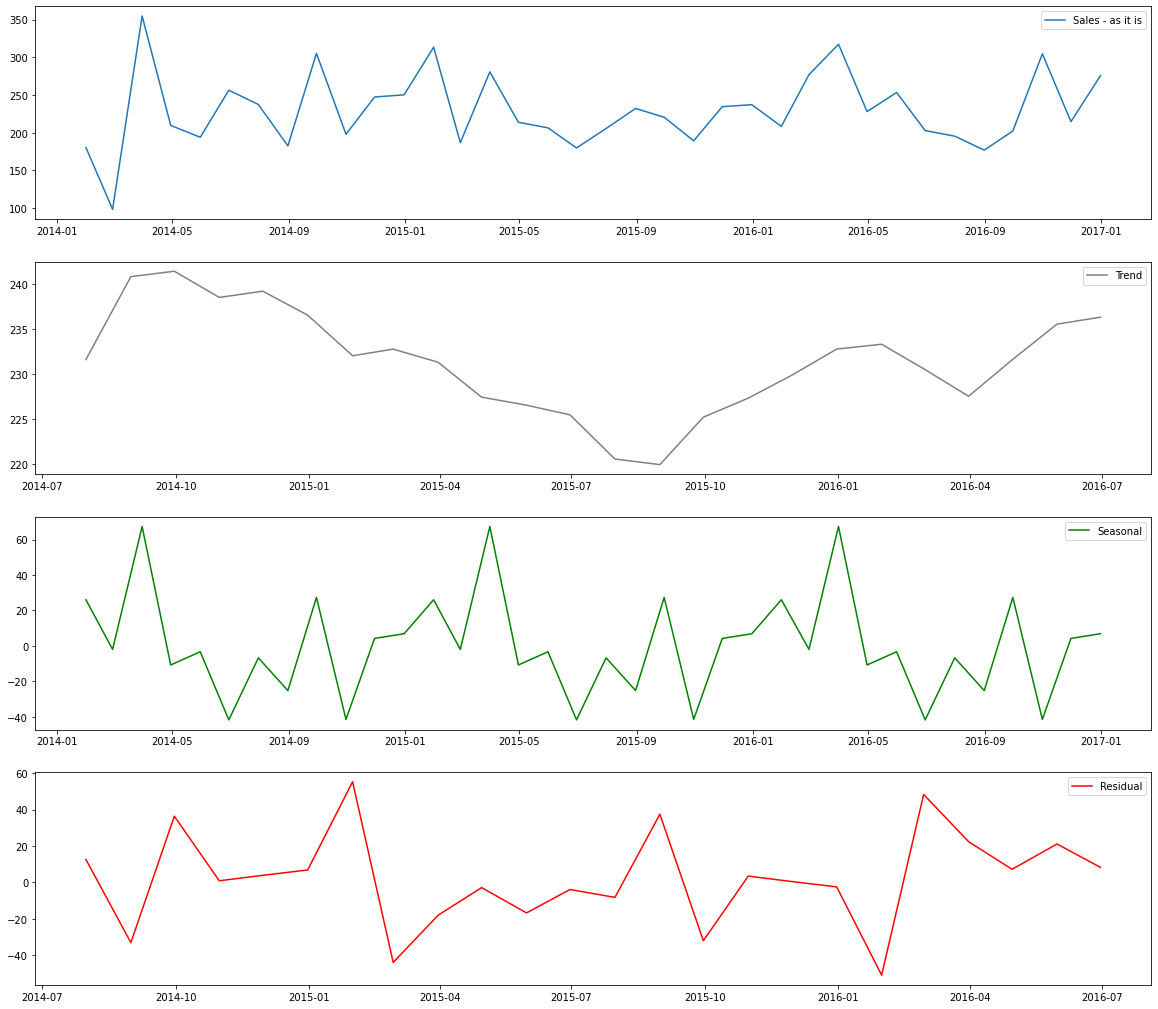

In [ ]:
decompose=seasonal_decompose(train['Sales'], period=12)
d_trend=decompose.trend
d_seasonal=decompose.seasonal
d_residual=decompose.resid

fig,ax = plt.subplots(3,1,figsize=(20,18))

plt.subplot(411)
plt.plot(train['Sales'],label='Sales - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend',color='gray')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal',color='green')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual',color='red')
plt.legend(loc='best');

**There is trend and seasonality in the data.**

# Stationarity Check

In [ ]:
def stationary(data):
  p_val = adfuller(data)[1]
  if p_val > 0.05:
    print(f'pvalue = {p_val}, Data is not stationary.')
  else :
    print(f'pvalue = {p_val}, Data is stationary.')

In [ ]:
stationary(train['Sales'])

pvalue = 0.0011796056726937477, Data is stationary.


# ACF and PACF Plot

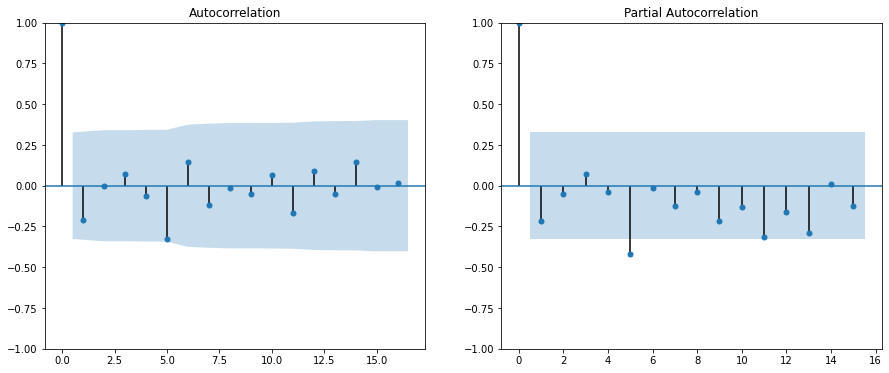

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
plot_acf(train['Sales'],ax=ax[0])
plot_pacf(train['Sales'],lags=15,ax=ax[1]);

**Best Fit value for p and q**

In [ ]:
sel=pd.DataFrame(columns=['p','q','Log_Likelihood','AIC'])
p=[]
q=[]
ll=[]
ac=[]
for i in range(6):
  for j in range(6):
    model = ARIMA(train['Sales'],order=(i,0,j)).fit()
    p.append(i)
    q.append(j)
    ll.append(model.llf)
    ac.append(model.aic)
sel['p']=p
sel['q']=q
sel['Log_Likelihood']=ll
sel['AIC']=ac

In [ ]:
sel

,p,q,Log_Likelihood,AIC
0,0,0,-191.696026,387.392052
1,0,1,-190.815497,387.630993
2,0,2,-190.811324,389.622648
3,0,3,-190.810707,391.621415
4,0,4,-186.897120,385.794241
5,0,5,-186.070697,386.141394
6,1,0,-190.875334,387.750669
7,1,1,-188.726644,385.453289
8,1,2,-188.716305,387.432610
9,1,3,-188.809529,389.619058


In [ ]:
model=ARIMA(train['Sales'],order=(5,0,5)).fit()
print('For Ljung Box Test Value greater than 0.05, Model is Good.')
ljung = sm.stats.acorr_ljungbox(model.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'For p = 5, q = 5 - LJung Box Test Value : {ljung}')

For Ljung Box Test Value greater than 0.05, Model is Good.
For p = 5, q = 5 - LJung Box Test Value : [0.80176222]


Considering the Log Likelihood Values, AIC and Ljung Test Values, it is concluded that p = 5 and q = 5 are the best possible fit the given data.

#  Data Mining

In [ ]:
def model(data,p,d,q):
  m1 = ARIMA(data,order=(p,d,q)).fit()
  return m1

In [ ]:
def pred_plot(model,dfr_tr,dfr_ts):
  plt.subplots(1,2,figsize=(20,6))
  plt.subplot(1,2,1)
  plt.plot(dfr_tr['Actual'],color='orange',label='Actual')
  plt.plot(dfr_tr['Predicted'],color='blue',label='Predicted')
  plt.plot(dfr_tr['Error'],color='yellow',label='Error')
  plt.title('In-Sample Prediction')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(dfr_ts['Actual'],color='orange',label='Actual')
  plt.plot(dfr_ts['Predicted'],color='blue',label='Predicted')
  plt.plot(dfr_ts['Error'],color='yellow',label='Error')
  plt.title('Out-of-Sample Forecast')
  plt.suptitle(f'Model : {model}')
  plt.legend()

In [ ]:
def dframe(pred_train,pred_test):
  trn = pd.DataFrame({'Actual':train['Sales'],'Predicted':pred_train})
  tst = pd.DataFrame({'Actual':test['Sales'],'Predicted':pred_test})
  trn['Error']=trn['Actual']-trn['Predicted']
  tst['Error']=tst['Actual']-tst['Predicted']
  return trn,tst

## ARMA Model

In [ ]:
arma = model(train['Sales'],5,0,5)
arma_train_pred = arma.predict(0,len(train))
arma_test_pred = arma.forecast(len(test))#,(len(train)+len(test)-1))
print(arma.summary())
ljung1 = sm.stats.acorr_ljungbox(arma.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung1}')

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 0, 5)   Log Likelihood                -182.653
Date:                Mon, 23 May 2022   AIC                            389.306
Time:                        12:18:51   BIC                            408.308
Sample:                    01-31-2014   HQIC                           395.938
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        230.7562      1.896    121.722      0.000     227.041     234.472
ar.L1         -0.4127      0.288     -1.434      0.151      -0.977       0.151
ar.L2         -0.1380      0.311     -0.444      0.6

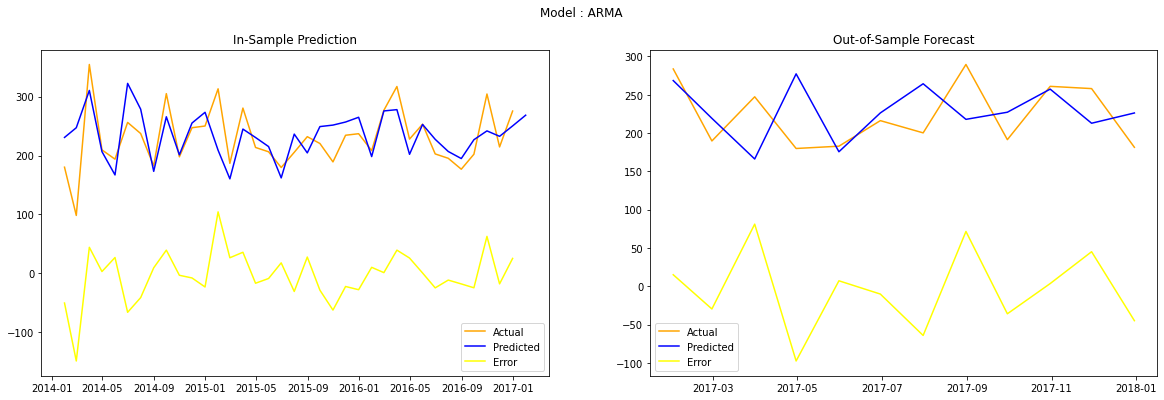

In [ ]:
df_arma_tr , df_arma_ts=dframe(arma_train_pred,arma_test_pred)
pred_plot('ARMA',df_arma_tr,df_arma_ts)

In-Sample Prediction : Prediction of the train data   
Out-of-Sample Forecast : Forecast for the test data

## ARIMA

In [ ]:
arima = model(train['Sales'],5,1,5)
arima_train_pred = arima.predict(0,len(train))
arima_test_pred = arima.forecast(len(test))#,(len(train)+len(test)-1))
print(arima.summary())
ljung2 = sm.stats.acorr_ljungbox(arima.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung2}')

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -183.277
Date:                Mon, 23 May 2022   AIC                            388.554
Time:                        12:19:45   BIC                            405.663
Sample:                    01-31-2014   HQIC                           394.460
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1319      0.340     -3.325      0.001      -1.799      -0.465
ar.L2         -0.9184      0.501     -1.832      0.067      -1.901       0.064
ar.L3         -0.3859      0.665     -0.580      0.5

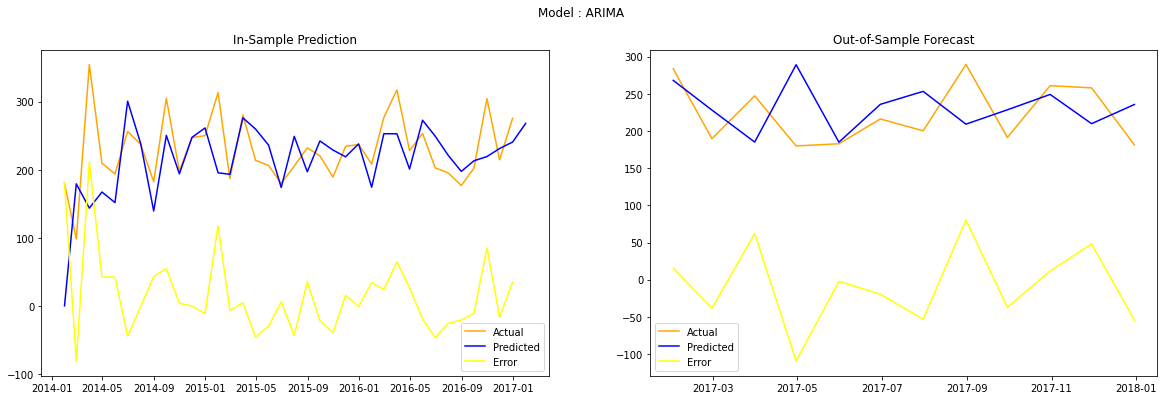

In [ ]:
df_arima_tr , df_arima_ts=dframe(arima_train_pred,arima_test_pred)
pred_plot('ARIMA',df_arima_tr,df_arima_ts)

## SARIMA Model

In [ ]:
sarima = SARIMAX(train['Sales'],order=(5,1,5),seasonal_order=(3,0,0,12)).fit()
sarima_train_pred = sarima.predict(0,(len(train)))
sarima_test_pred = sarima.forecast(len(test))#,(len(train)+len(test)-1))
print(sarima.summary())
ljung3 = sm.stats.acorr_ljungbox(sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung3}')

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   36
Model:             SARIMAX(5, 1, 5)x(3, 0, [], 12)   Log Likelihood                -181.079
Date:                             Mon, 23 May 2022   AIC                            390.157
Time:                                     12:37:39   BIC                            411.932
Sample:                                 01-31-2014   HQIC                           397.674
                                      - 12-31-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6736      0.332     -2.027      0.043      -1.325      -0.022
ar.L2         -0.6543      

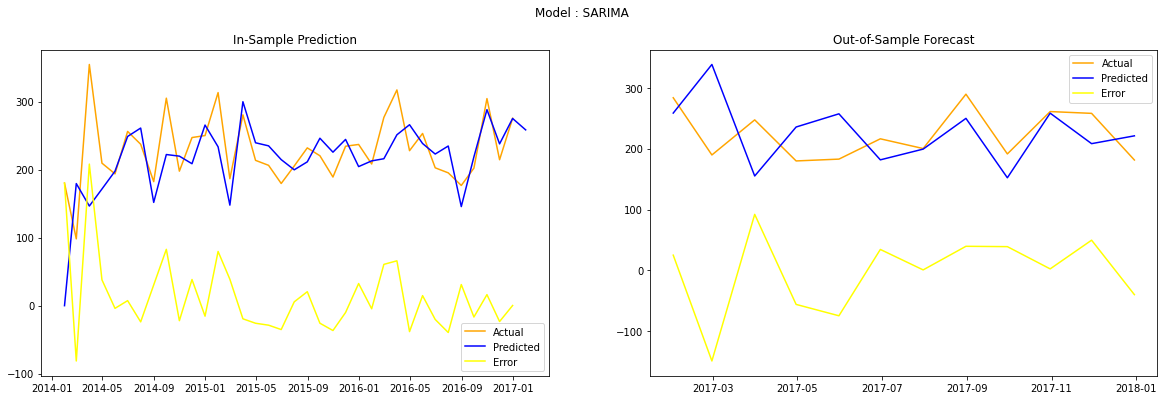

In [ ]:
df_sarima_tr , df_sarima_ts=dframe(sarima_train_pred,sarima_test_pred)
pred_plot('SARIMA',df_sarima_tr,df_sarima_ts)

In [ ]:
ms=[]
rms=[]
aic=[]
bic=[]
compare=pd.DataFrame(columns=['MSE','RMSE','AIC','BIC'],index=['ARMA','ARIMA','SARIMA'])
for i in [arma,arima,sarima]:
  aic.append(i.aic)
  bic.append(i.bic)
  if (i == arma):
      ms.append(mse(arma_test_pred,test['Sales']))
      rms.append(np.sqrt(mse(arma_test_pred,test['Sales'])))
  if (i == arima):
      ms.append(mse(arima_test_pred,test['Sales']))
      rms.append(np.sqrt(mse(arima_test_pred,test['Sales'])))
  if (i == sarima):
      ms.append(mse(sarima_test_pred,test['Sales']))
      rms.append(np.sqrt(mse(sarima_test_pred,test['Sales'])))
compare['MSE']=ms
compare['RMSE']=rms
compare['AIC']=aic
compare['BIC']=bic

In [ ]:
compare

,MSE,RMSE,AIC,BIC
ARMA,2658.830359,51.563847,389.305775,408.308002
ARIMA,2831.797869,53.214640,388.553983,405.662812
SARIMA,4018.432024,63.391104,390.157476,411.932349


**Considering the RMSE, AIC and BIC, ARIMA Model gives the best posiible Sale Forecast.**



---